In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


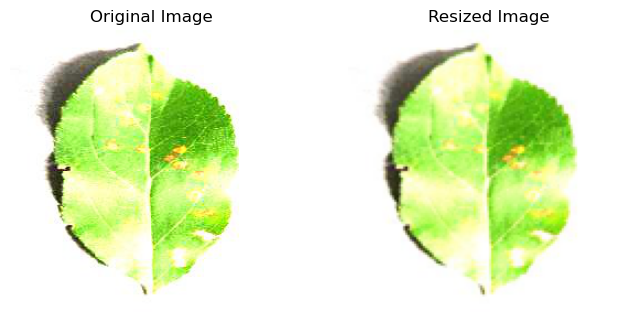

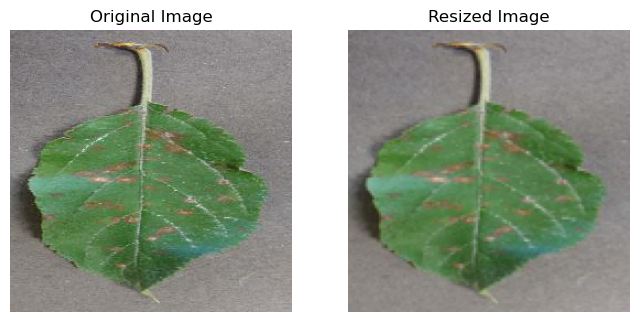

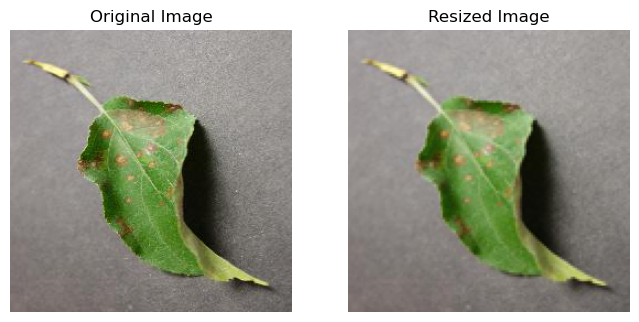

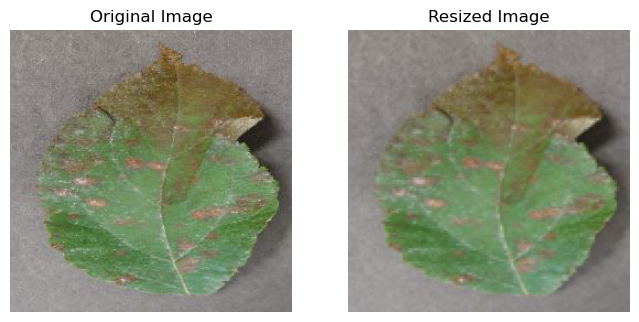

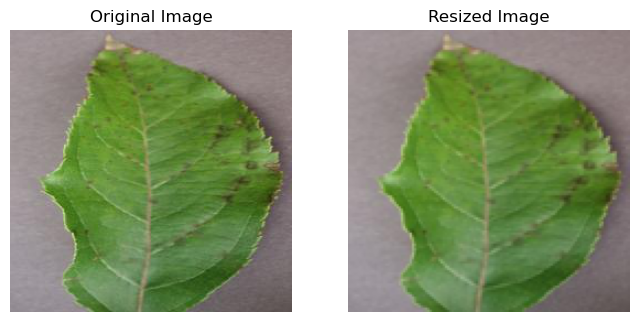

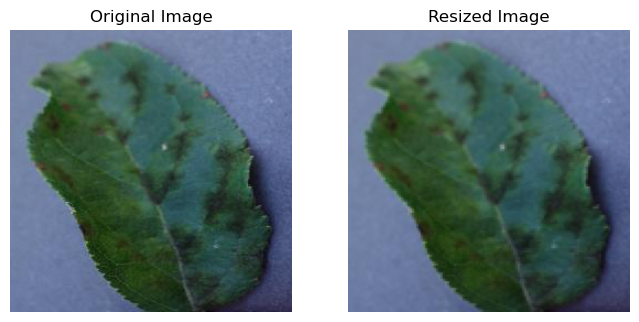

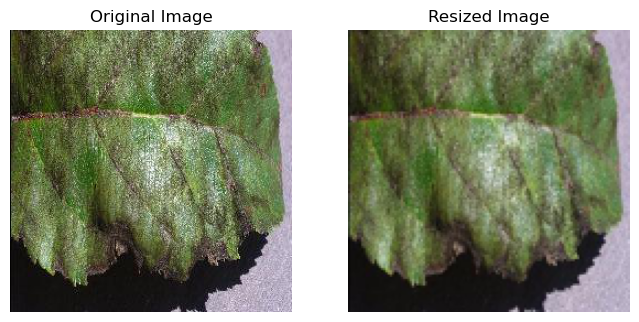

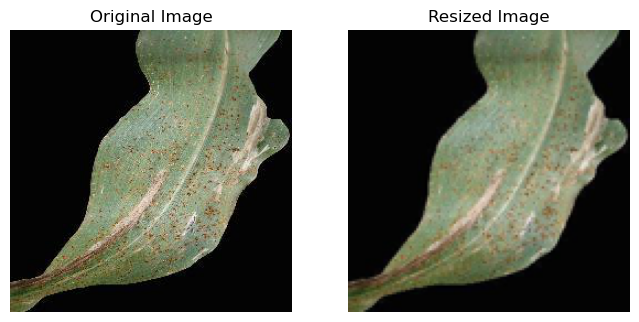

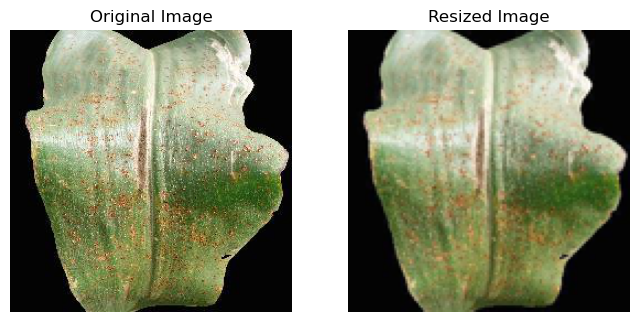

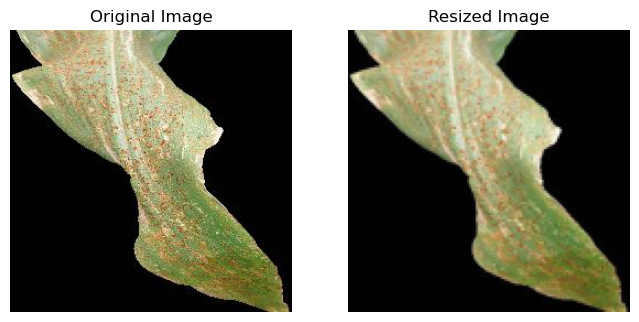

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def resize_images(input_folder, output_folder, target_size, num_images=10):
    os.makedirs(output_folder, exist_ok=True)

    filenames = os.listdir(input_folder)
    for filename in filenames[:num_images]:
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        img = Image.open(input_path)
        img_resized = img.resize(target_size)

        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(img_resized)
        plt.title("Resized Image")
        plt.axis("off")

        plt.show()

        img_resized.save(output_path)

input_folder = r"C:\Users\chakr\Downloads\archive\test\test"
output_folder = r"C:\Users\chakr\Downloads\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\resize"
target_size = (128, 128)
resize_images(input_folder, output_folder, target_size, num_images=10)

In [11]:
#train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/train",image_size=(256, 256))
#test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/valid",image_size=(256, 256))

train_gen = image_dataset_from_directory(directory=r"C:\Users\chakr\Downloads\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory=r"C:\Users\chakr\Downloads\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.



In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                  

Epoch 1/5

2197/2197 [==============================] - 6990s 3s/step - loss: 1.6768 - accuracy: 0.5150 - val_loss: 0.5497 - val_accuracy: 0.8268
Epoch 2/5
2197/2197 [==============================] - 6321s 3s/step - loss: 0.4585 - accuracy: 0.8535 - val_loss: 0.2594 - val_accuracy: 0.9140
Epoch 3/5
2197/2197 [==============================] - 6243s 3s/step - loss: 0.2660 - accuracy: 0.9139 - val_loss: 0.2562 - val_accuracy: 0.9165
Epoch 4/5
2197/2197 [==============================] - 6513s 3s/step - loss: 0.1838 - accuracy: 0.9385 - val_loss: 0.1898 - val_accuracy: 0.9372
Epoch 5/5
2197/2197 [==============================] - 6224s 3s/step - loss: 0.1353 - accuracy: 0.9544 - val_loss: 0.1867 - val_accuracy: 0.9421
INFO:tensorflow:Assets written to: C:\Users\chakr\Downloads\model\plant_96.5.pt\assets


INFO:tensorflow:Assets written to: C:\Users\chakr\Downloads\model\plant_96.5.pt\assets


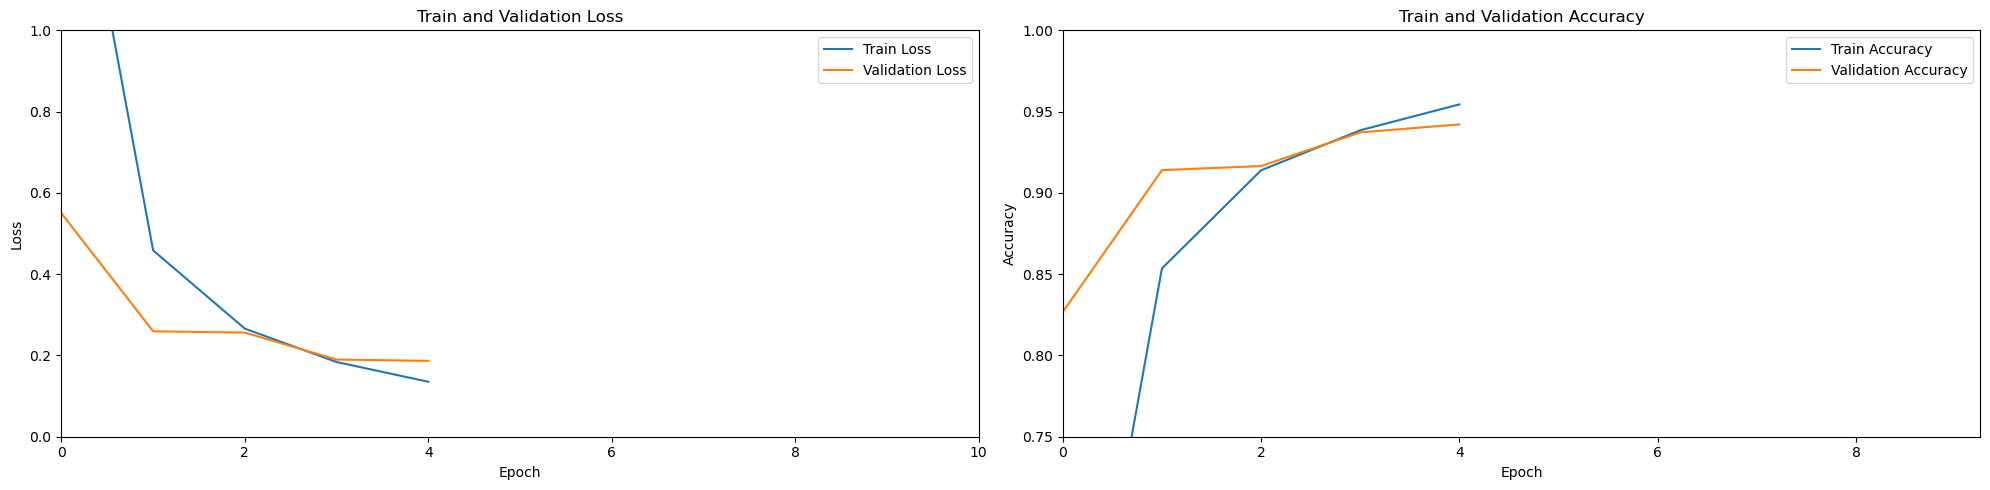

In [4]:
ep = 5
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()
model.save(r"C:\Users\chakr\Downloads\model\plant_96.h5")
# model.save(r"C:\Users\chakr\Downloads\model\plant_96.5.pt")

In [5]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 499ms/step


1/1 [==============================] - 2s 2s/step


In [8]:
predictions
labels

[8,
 19,
 16,
 37,
 27,
 32,
 29,
 28,
 23,
 33,
 7,
 7,
 18,
 8,
 36,
 21,
 5,
 27,
 2,
 21,
 27,
 12,
 26,
 1,
 28,
 23,
 18,
 1,
 10,
 27,
 35,
 31,
 14,
 3,
 4,
 7,
 0,
 8,
 24,
 36,
 3,
 18,
 13,
 10,
 21,
 6,
 2,
 20,
 3,
 22,
 16,
 10,
 3,
 33,
 8,
 14,
 9,
 22,
 23,
 24,
 10,
 28,
 30,
 7,
 7,
 10,
 31,
 19,
 29,
 5,
 37,
 5,
 5,
 23,
 23,
 9,
 26,
 4,
 14,
 6,
 0,
 12,
 27,
 14,
 21,
 37,
 32,
 29,
 21,
 9,
 27,
 31,
 32,
 22,
 10,
 4,
 25,
 19,
 3,
 25,
 11,
 34,
 16,
 25,
 19,
 30,
 30,
 25,
 20,
 25,
 35,
 23,
 19,
 9,
 36,
 27,
 22,
 35,
 37,
 20,
 14,
 13,
 37,
 10,
 19,
 23,
 11,
 24,
 10,
 8,
 31,
 8,
 33,
 27,
 24,
 29,
 18,
 23,
 30,
 21,
 37,
 28,
 17,
 29,
 31,
 27,
 11,
 1,
 28,
 24,
 28,
 12,
 21,
 10,
 12,
 20,
 30,
 14,
 21,
 2,
 4,
 19,
 5,
 34,
 2,
 16,
 25,
 2,
 16,
 16,
 37,
 34,
 35,
 22,
 20,
 15,
 6,
 2,
 32,
 1,
 19,
 33,
 32,
 34,
 18,
 37,
 12,
 3,
 15,
 32,
 22,
 2,
 0,
 18,
 13,
 18,
 16,
 27,
 37,
 7,
 20,
 17,
 32,
 1,
 30,
 14,
 36,
 12,
 6,
 12,


In [9]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.44 %
Test Accuracy   : 94.21 %
Precision Score : 94.21 %
Recall Score    : 94.21 %


In [11]:
class_labels =['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

<Figure size 2000x500 with 0 Axes>

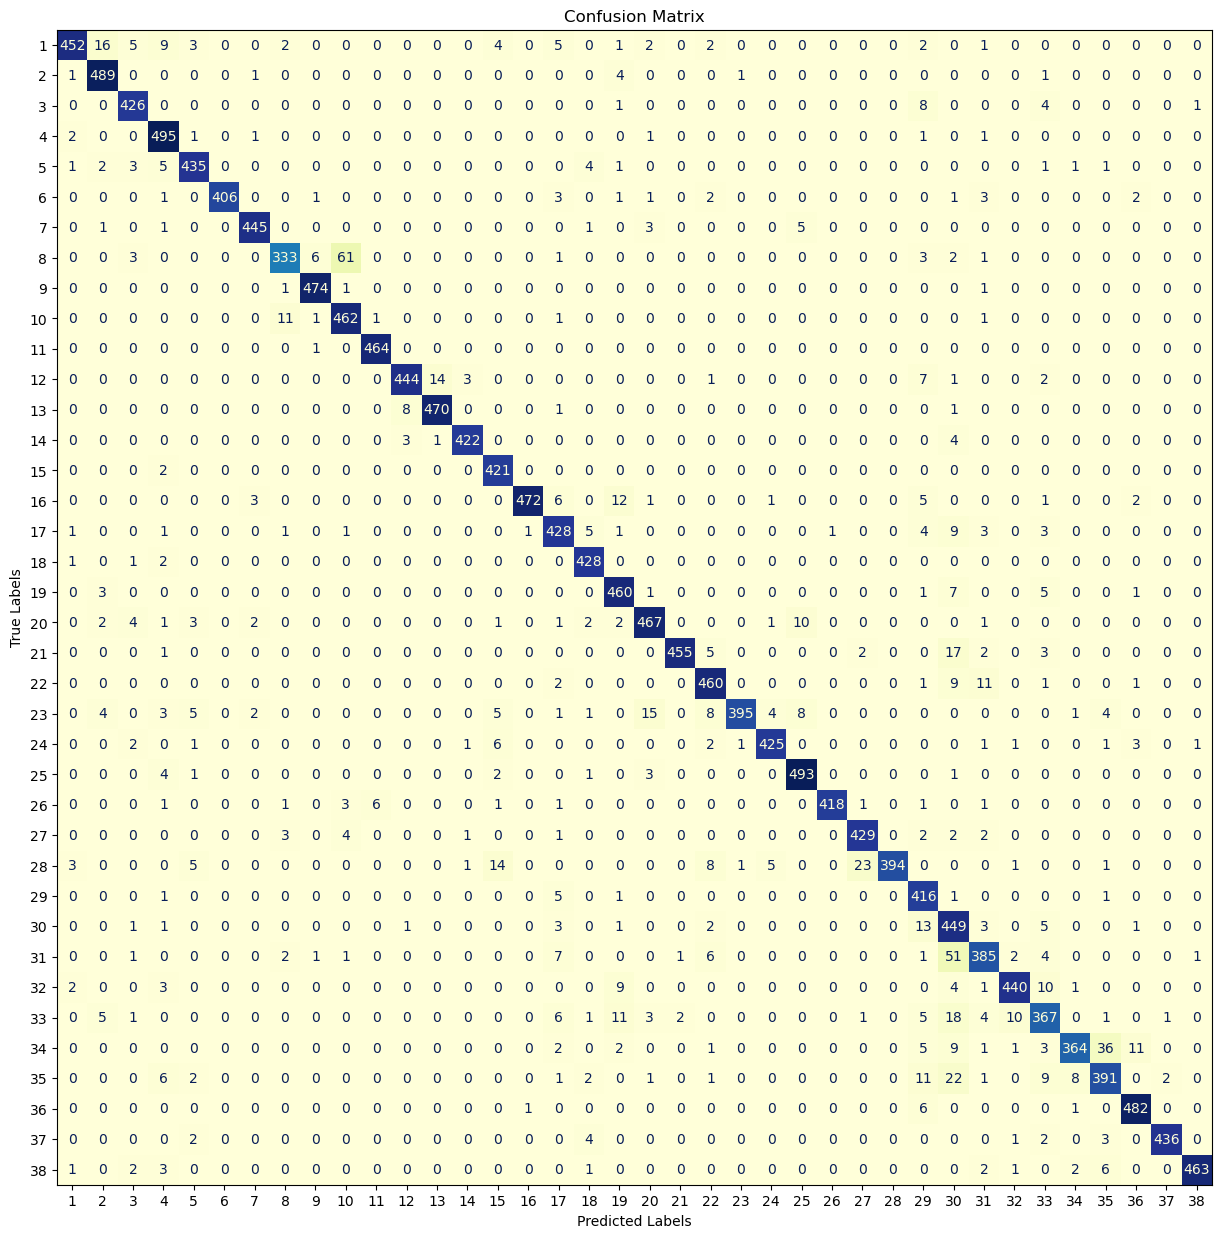

In [12]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image

# Load the trained model
saved_model_path = r"C:\Users\chakr\Downloads\model\plant_96.h5"
loaded_model = tf.keras.models.load_model(saved_model_path)

In [15]:


# Function to predict new images
def predict_new_image(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))  # Load the image and resize to match the model's input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch of size 1

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the class with the highest probability
    return predicted_class

# Path to the new image you want to predict
#new_image_path =r"C:\Users\chakr\Downloads\archive\test\test\TomatoYellowCurlVirus1.JPG"
# Get the prediction for the new image
#predicted_class = predict_new_image(new_image_path, loaded_model)
#print("Predicted Class:", predicted_class)
#print("Predicted Class:", class_labels[predicted_class])

In [16]:
new_image_path =r"C:\Users\chakr\Downloads\archive\test\test\TomatoYellowCurlVirus1.JPG"
# Get the prediction for the new image
predicted_class = predict_new_image(new_image_path, loaded_model)
print("Predicted Class:", predicted_class)
print("Predicted Class:", class_labels[predicted_class])

1/1 [==============================] - 0s 163ms/step
Predicted Class: 35
Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
